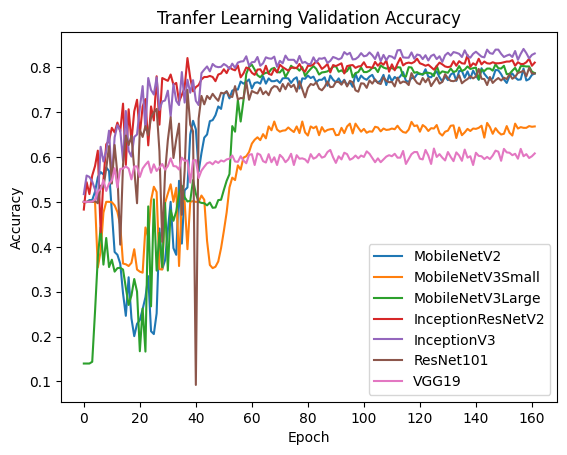

In [1]:
import json
import matplotlib.pyplot as plt

modelNames = ["MobileNetV2", "MobileNetV3Small", "MobileNetV3Large", "InceptionResNetV2", "InceptionV3", "ResNet101", "VGG19"]

data = []
# import the JSON files
for modelName in modelNames:
		f = open ('completed/training-results/' + modelName + '.json', "r")
		data.append(json.loads(f.read()))

# Plot the graph using ['accuracy'] and ['val_accuracy']

for d in data:
		plt.plot(d['val_accuracy'], label=d['BaseModelName'])

plt.title('Tranfer Learning Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()



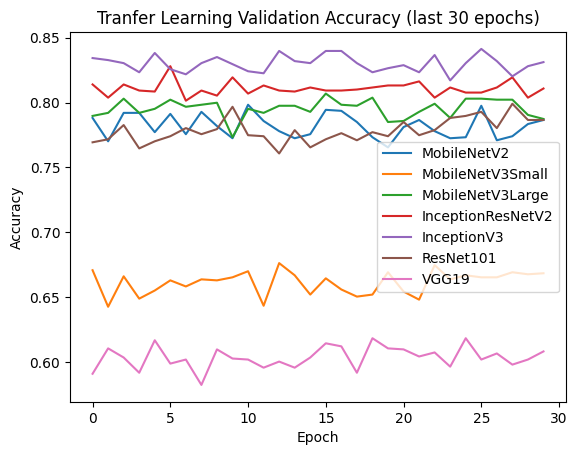

In [2]:
# Plot the last 30 epochs
for d in data:
		plt.plot(d['val_accuracy'][-30:], label=d['BaseModelName'])

plt.title('Tranfer Learning Validation Accuracy (last 30 epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


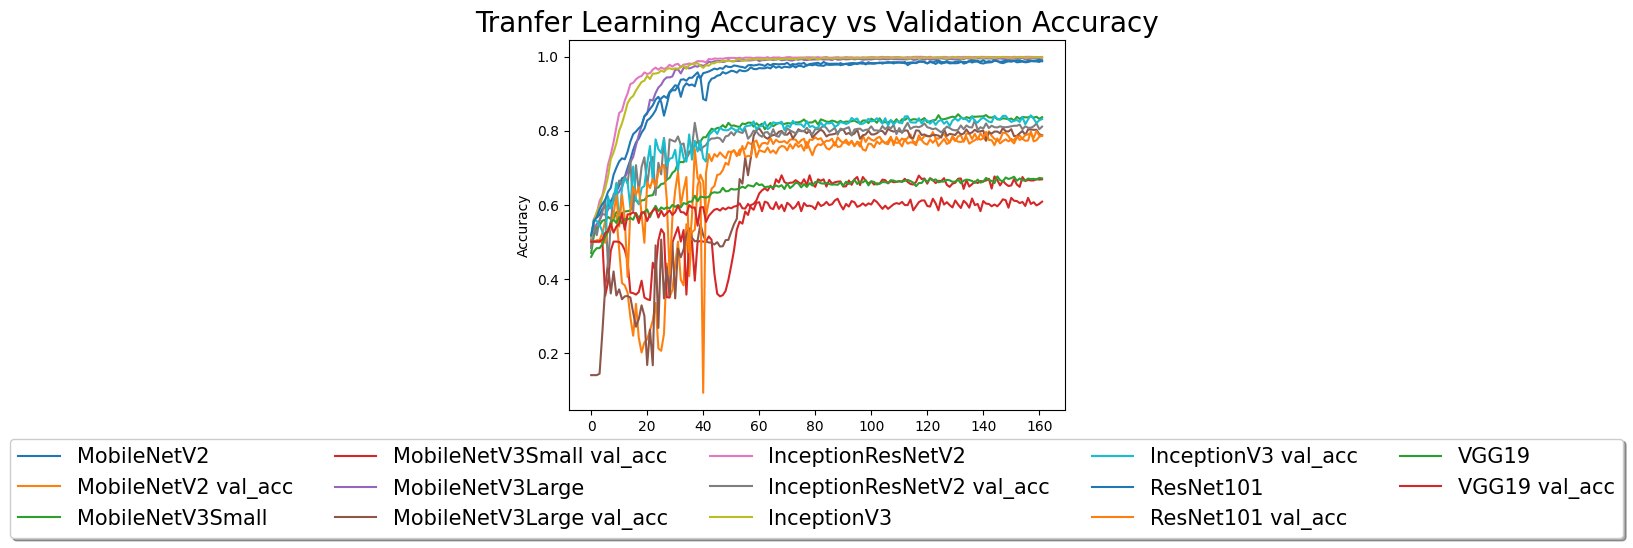

In [3]:
# Graph the loss and the validation loss for each model
for d in data:
		plt.plot(d['accuracy'], label=d['BaseModelName'])
		plt.plot(d['val_accuracy'], label=d['BaseModelName'] + ' val_acc')

plt.figure(figsize=(20,10))
plt.title('Tranfer Learning Accuracy vs Validation Accuracy', fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5, fontsize=15)

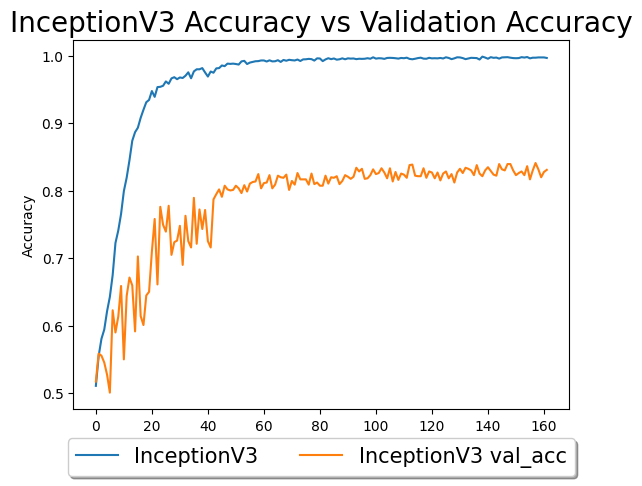

In [4]:
# Graph the inceptionv3 training results
inceptionData = data[4]

plt.plot(inceptionData['accuracy'], label='InceptionV3')
plt.plot(inceptionData['val_accuracy'], label='InceptionV3 val_acc')

plt.title('InceptionV3 Accuracy vs Validation Accuracy', fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
					fancybox=True, shadow=True, ncol=5, fontsize=15)

In [5]:
# print the highest validation accuracy and the lowest validation loss for each model
for d in data:
		print(d['BaseModelName'])
		print('Maximum validation accuracy:\t\t', max(d['val_accuracy']))
		print('Minimum validation loss:\t\t', min(d['val_loss']))
		print('')

MobileNetV2
Maximum validation accuracy:		 0.798279881477356
Minimum validation loss:		 0.34492427110671997

MobileNetV3Small
Maximum validation accuracy:		 0.6794370412826538
Minimum validation loss:		 0.4207272231578827

MobileNetV3Large
Maximum validation accuracy:		 0.8068803548812866
Minimum validation loss:		 0.39962688088417053

InceptionResNetV2
Maximum validation accuracy:		 0.8279905915260315
Minimum validation loss:		 0.36184900999069214

InceptionV3
Maximum validation accuracy:		 0.8412822484970093
Minimum validation loss:		 0.30614280700683594

ResNet101
Maximum validation accuracy:		 0.7990617752075195
Minimum validation loss:		 0.3056398630142212

VGG19
Maximum validation accuracy:		 0.6192337870597839
Minimum validation loss:		 0.3742518424987793



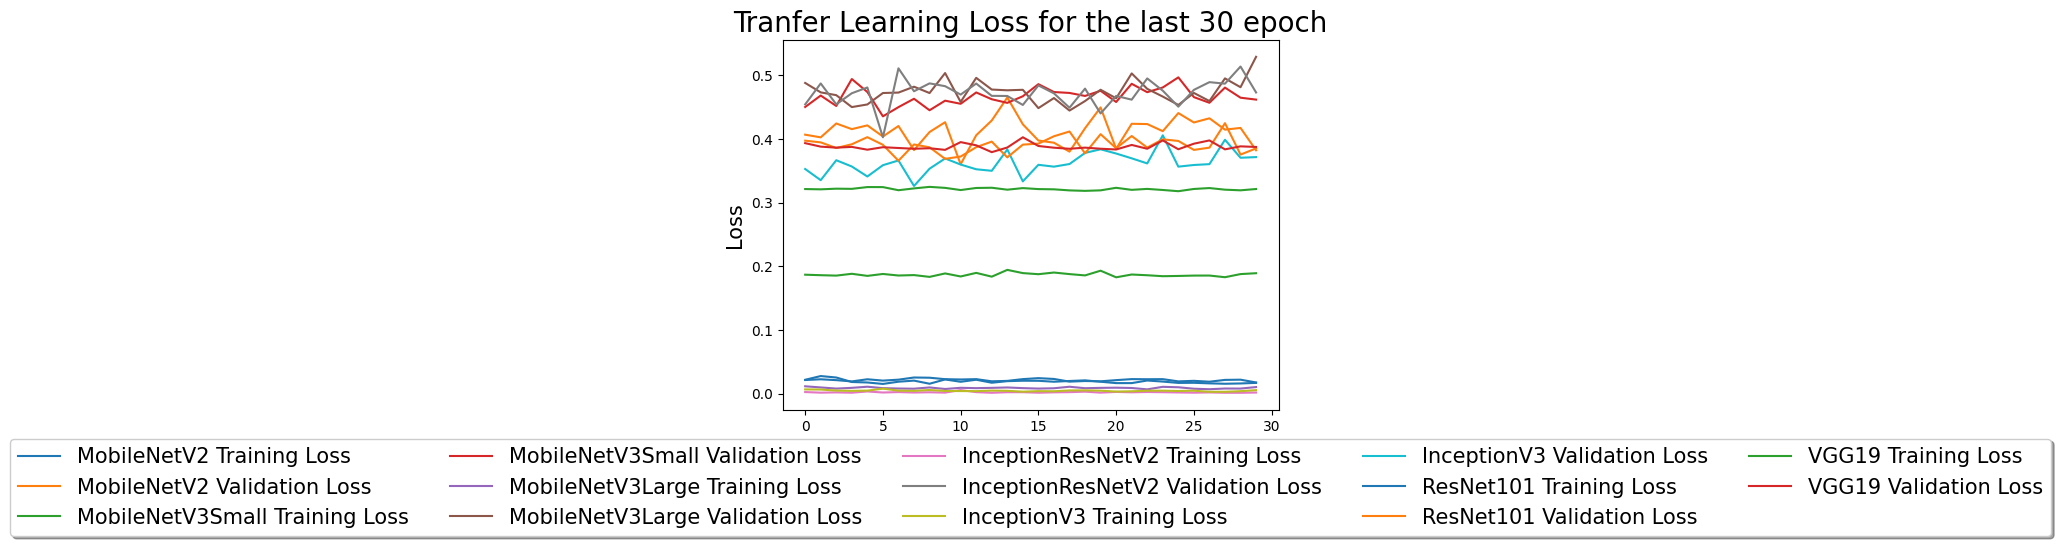

In [6]:
# Graph the loss and the validation loss for each model
for d in data:
		plt.plot(d['loss'][-30:], label=d['BaseModelName'] + ' Training Loss')
		plt.plot(d['val_loss'][-30:], label=d['BaseModelName'] + ' Validation Loss')
plt.figure(figsize=(20,10))
plt.title('Tranfer Learning Loss for the last 30 epoch', fontsize=20)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5, fontsize=15)

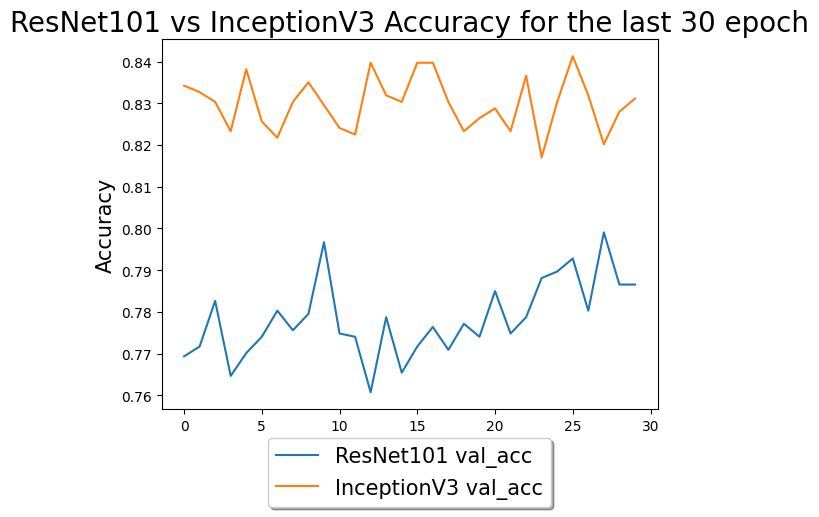

In [7]:
# Comparing ResNet101 and InceptionV3
resnetData = data[5]
inceptionData = data[4]
plt.figure(figsize=(20,10))
plt.plot(resnetData['val_accuracy'][-30:], label='ResNet101 val_acc')
plt.plot(inceptionData['val_accuracy'][-30:], label='InceptionV3 val_acc')
plt.title('ResNet101 vs InceptionV3 Accuracy for the last 30 epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
					fancybox=True, shadow=True, fontsize=15)


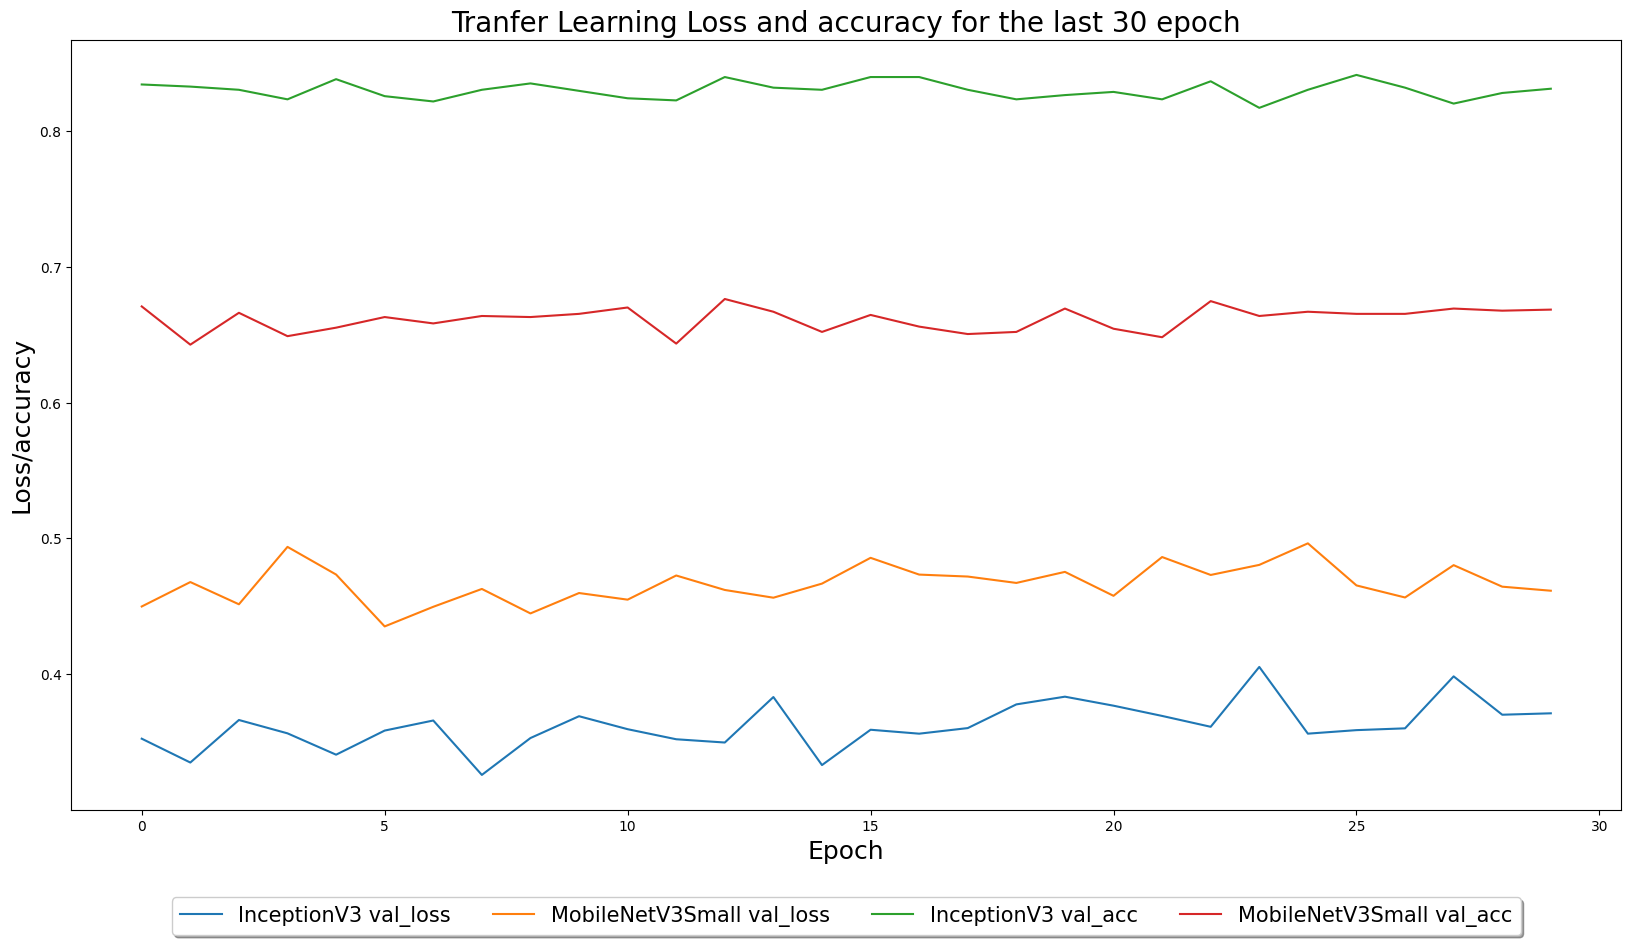

In [18]:
# Graph the loss and the validation loss for each model
plt.figure(figsize=(20,10))

inceptionData = data[4]
mobilenetv3smallData = data[1]

plt.plot(inceptionData['val_loss'][-30:], label='InceptionV3 val_loss')
plt.plot(mobilenetv3smallData['val_loss'][-30:], label='MobileNetV3Small val_loss')
plt.plot(inceptionData['val_accuracy'][-30:], label='InceptionV3 val_acc')
plt.plot(mobilenetv3smallData['val_accuracy'][-30:], label='MobileNetV3Small val_acc')



plt.title('Tranfer Learning Loss and accuracy for the last 30 epoch', fontsize=20)
plt.ylabel('Loss/accuracy', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5, fontsize=15)